In [2]:
#read in data
import pandas as pd
colnames = ["method", "species", "goid"]
df = pd.read_csv("goids.csv", names = colnames, header = None)
df.describe()

,method,species,goid
count,38968,38968,38968
unique,4,4,1985
top,hmmer_goids,sechellia,GO:0016021
freq,14729,10198,1100


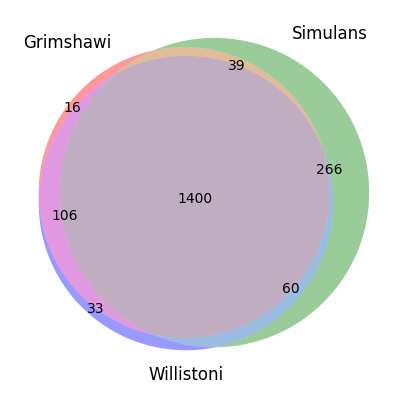

In [86]:
#generate Venn diagram
from matplotlib_venn import venn2, venn3
from upsetplot import from_memberships, UpSet
from matplotlib import pyplot as plt

sechellia = set(df[df["species"] == "sechellia"].loc[:, "goid"])
simulans = set(df[df["species"] == "simulans"].loc[:, "goid"])
willistoni = set(df[df["species"] == "willistoni"].loc[:, "goid"])
grimshawi = set(df[df["species"] == "grimshawi"].loc[:, "goid"])


venn3([grimshawi, simulans, willistoni], ('Grimshawi', 'Simulans', 'Willistoni'))
plt.show()

In [62]:
df.head()
df["method"].value_counts()


hmmer_goids            14729
hmmer_aug_goids        14729
blastp_goids            4755
blastp_not_resgoids     4755
Name: method, dtype: int64

In [65]:
def flatten_species(species_list):
    species_string = ','.join(str(species) for species in species_list)
    return species_string

def reformat_for_Upset(df, method):
    """_summary_

    Args:
        df (pd.DataFrame): Dataframe containing the GOID data
        method (str): method by which GOIDs were generated;
        choose from: blastp_goids, blastp_not_resgpoids,
        hmmer_goids and hmmer_aug_goids

    Returns:
        goids_by_species (pd.DataFrame): DF ready to be used by UpSetPlot
    """
    #subset data based on method
    df = df[df["method"] == method]
    #reformat columns for upset format
    df_reformat = pd.DataFrame(df.groupby("goid")["species"].unique())
    df_reformat["species"] = df_reformat["species"].apply(flatten_species)
    goids_by_species = from_memberships(df_reformat.species.str.split(','), data = df_reformat)

    return goids_by_species

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

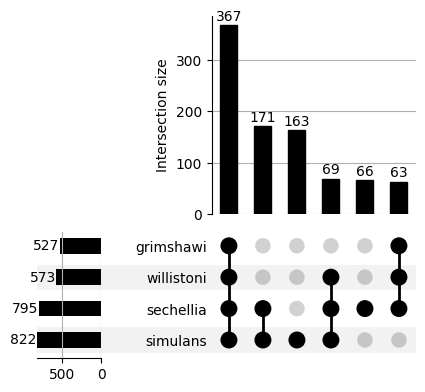

In [73]:
df_method = reformat_for_Upset(df, "blastp_goids")
UpSet(df_method, sort_by='cardinality', min_subset_size = 40, show_counts=True).plot()

In [ ]:
#generate co-occurence matrix via seaborn
# co_mat = pd.crosstab(my_data_frame.province, my_data_frame.position)
# sns.heatmap(co_mat)